# SENTIMENT ANALYSIS

## Preprocessing 

In [43]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
import spacy


In [44]:
tweets = pd.read_csv('tweets_csv.csv')
tweets2 = pd.read_excel('data_excel.xlsx')

In [45]:
df=pd.concat([tweets,tweets2],axis=0)
df = df[df['lang'] == 'en']

In [46]:
df = df.drop(columns=['Unnamed: 0.1','Unnamed: 0','likeCount','retweetCount','user','lang'])
df = df.reset_index()
df = df.drop(columns=['index'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9182 entries, 0 to 9181
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        9182 non-null   object
 1   rawContent  9182 non-null   object
 2   place       2973 non-null   object
 3   hashtags    9153 non-null   object
dtypes: object(4)
memory usage: 287.1+ KB


In [47]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [48]:
def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

def strip_all_entities(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

In [49]:
df['Content'] = df['rawContent'].apply(lambda x: strip_all_entities(strip_links(x))) #removing links, hashtags, mentions

In [50]:
df['Content'] = df['Content'].apply(lambda x: " ".join(x.lower() for x in x.split()))  #lowercase
df['Content'] = df['Content'].str.replace('[^\w\s]','')  #removing punctuation
df['Content'].head()

C:\Users\abhin\AppData\Local\Temp\ipykernel_6060\339311876.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Content'] = df['Content'].str.replace('[^\w\s]','')  #removing punctuation


0       opened the shutters of dam beautiful amp scary
1                                it s rising stay safe
2                             more pics from the scene
3    dams third shutter opened for first time in 26...
4                     idukki dam opened after 26 years
Name: Content, dtype: object

In [51]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
df['Content'] = df['Content'].apply(lambda x: remove_emoji(x))

In [52]:
stop = stopwords.words('english')
df['Content'] = df['Content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head(20)

,date,rawContent,place,hashtags,Content
0,2018-08-01 07:42:50,Opened the shutters of #Malampuzha dam #Palakk...,"{'id': '09294260a5199155', 'fullName': 'Ulliye...","['Malampuzha', 'Palakkad', 'KeralaFlood']",opened shutters dam beautiful amp scary
1,2018-08-09 05:02:39,It's rising. Stay safe. #Keralarains#kalady ht...,"{'id': '7a01d1cbca786e81', 'fullName': 'Kanaya...",NaN,rising stay safe
2,2018-08-09 05:42:24,More pics from the scene. #kalady#keralaflood ...,"{'id': '7a01d1cbca786e81', 'fullName': 'Kanaya...",NaN,pics scene
3,2018-08-09 07:07:00,#idukki dams third shutter opened for first ti...,"{'id': '5d01806d080d1e50', 'fullName': 'Kerala...","['idukki', 'Kerala', 'periyar', 'aluva', 'Kera...",dams third shutter opened first time 26 years ...
4,2018-08-09 07:26:31,Idukki dam opened after 26 years!\n#IDUKKI \n#...,"{'id': '24dab5a953e050c5', 'fullName': 'Trivan...","['IDUKKI', 'keralarains']",idukki dam opened 26 years
5,2018-08-09 07:40:32,#kerala stay safe #keralarains #GodsOwnCountry,"{'id': '5f55bb82cf16ac81', 'fullName': 'Bengal...","['kerala', 'keralarains', 'GodsOwnCountry']",stay safe
6,2018-08-09 09:21:30,"#KeralaFloods so, national media again suffers...","{'id': '6d86f195adaa42fb', 'fullName': 'Saidap...",['KeralaFloods'],national media suffers tyranny distance covera...
7,2018-08-09 09:25:21,Heavy rains wash away Railway tracks in Palakk...,"{'id': '03b7ea94ef68e9d7', 'fullName': 'Mylapo...",['keralarains'],heavy rains wash away railway tracks palakkad
8,2018-08-09 10:03:02,Avoid roads like these as heavy rain lashing i...,"{'id': '232099930cfd4364', 'fullName': 'Munnar...","['Kerala', 'KeralaFloods']",avoid roads like heavy rain lashing hilly regi...
9,2018-08-09 10:07:03,Guidelines for tourists in #KeralaFloods. Thi...,"{'id': '232099930cfd4364', 'fullName': 'Munnar...","['KeralaFloods', 'Kerala']",guidelines tourists things avoid travelling he...


In [53]:
#lemmatization / removing grammar tense.
def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])
df['Content']= df['Content'].apply(space)
df.head(20)

,date,rawContent,place,hashtags,Content
0,2018-08-01 07:42:50,Opened the shutters of #Malampuzha dam #Palakk...,"{'id': '09294260a5199155', 'fullName': 'Ulliye...","['Malampuzha', 'Palakkad', 'KeralaFlood']",open shutter dam beautiful amp scary
1,2018-08-09 05:02:39,It's rising. Stay safe. #Keralarains#kalady ht...,"{'id': '7a01d1cbca786e81', 'fullName': 'Kanaya...",NaN,rise stay safe
2,2018-08-09 05:42:24,More pics from the scene. #kalady#keralaflood ...,"{'id': '7a01d1cbca786e81', 'fullName': 'Kanaya...",NaN,pic scene
3,2018-08-09 07:07:00,#idukki dams third shutter opened for first ti...,"{'id': '5d01806d080d1e50', 'fullName': 'Kerala...","['idukki', 'Kerala', 'periyar', 'aluva', 'Kera...",dams third shutter open first time 26 year flo...
4,2018-08-09 07:26:31,Idukki dam opened after 26 years!\n#IDUKKI \n#...,"{'id': '24dab5a953e050c5', 'fullName': 'Trivan...","['IDUKKI', 'keralarains']",idukki dam open 26 year
5,2018-08-09 07:40:32,#kerala stay safe #keralarains #GodsOwnCountry,"{'id': '5f55bb82cf16ac81', 'fullName': 'Bengal...","['kerala', 'keralarains', 'GodsOwnCountry']",stay safe
6,2018-08-09 09:21:30,"#KeralaFloods so, national media again suffers...","{'id': '6d86f195adaa42fb', 'fullName': 'Saidap...",['KeralaFloods'],national medium suffer tyranny distance covera...
7,2018-08-09 09:25:21,Heavy rains wash away Railway tracks in Palakk...,"{'id': '03b7ea94ef68e9d7', 'fullName': 'Mylapo...",['keralarains'],heavy rain wash away railway track palakkad
8,2018-08-09 10:03:02,Avoid roads like these as heavy rain lashing i...,"{'id': '232099930cfd4364', 'fullName': 'Munnar...","['Kerala', 'KeralaFloods']",avoid road like heavy rain lash hilly region f...
9,2018-08-09 10:07:03,Guidelines for tourists in #KeralaFloods. Thi...,"{'id': '232099930cfd4364', 'fullName': 'Munnar...","['KeralaFloods', 'Kerala']",guideline tourist thing avoid travel heavy rain


## Analysis

In [54]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [55]:
df['Sentiment'] = ''
df['Score'] = ''

In [56]:
analyser = SentimentIntensityAnalyzer()
for i in range(9182):
    content = df['Content'][i]
    pol = analyser.polarity_scores(content)
    print("{:-<65} {}".format(content, str(pol)))
    df['Score'][i] = pol['compound']
    if pol['compound'] >= 0.1 :
        df['Sentiment'][i] = 'Positive'
    elif pol['compound'] <= - 0.1 :
        df['Sentiment'][i] = 'Negative'
    else :
        df['Sentiment'][i] = 'Neutral'

open shutter dam beautiful amp scary----------------------------- {'neg': 0.288, 'neu': 0.36, 'pos': 0.351, 'compound': 0.1779}
rise stay safe--------------------------------------------------- {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}
pic scene-------------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
dams third shutter open first time 26 year flood likely---------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
idukki dam open 26 year------------------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
stay safe-------------------------------------------------------- {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}
national medium suffer tyranny distance coverage unprecedented situation {'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.5423}
heavy rain wash away railway track palakkad---------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
avo

In [57]:
df['Score']

0       0.1779
1       0.4404
2          0.0
3          0.0
4          0.0
         ...  
9177    0.9231
9178     0.836
9179    0.6808
9180    0.6124
9181   -0.8402
Name: Score, Length: 9182, dtype: object

In [58]:
df['Sentiment']

0       Positive
1       Positive
2        Neutral
3        Neutral
4        Neutral
          ...   
9177    Positive
9178    Positive
9179    Positive
9180    Positive
9181    Negative
Name: Sentiment, Length: 9182, dtype: object

In [59]:
df['Sentiment'].value_counts()

Positive    5560
Neutral     1861
Negative    1761
Name: Sentiment, dtype: int64

## Visualisation

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

<Axes: xlabel='Score', ylabel='Count'>

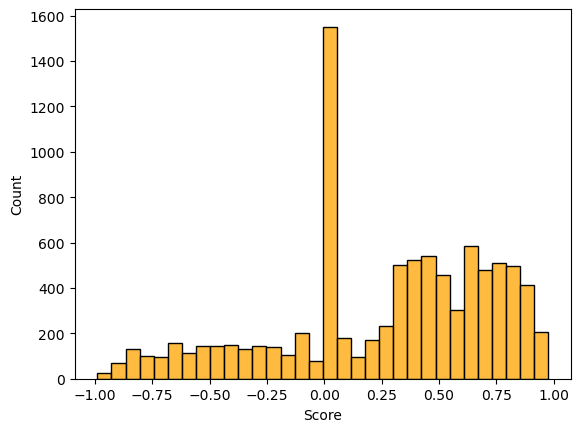

In [61]:
sns.histplot(data = df['Score'], color = "orange")

In [62]:
df.columns

Index(['date', 'rawContent', 'place', 'hashtags', 'Content', 'Sentiment',
       'Score'],
      dtype='object')

In [63]:
df['totalwords'] = df['Content'].str.split().str.len()
df[['Content','totalwords']]

,Content,totalwords
0,open shutter dam beautiful amp scary,6
1,rise stay safe,3
2,pic scene,2
3,dams third shutter open first time 26 year flo...,10
4,idukki dam open 26 year,5
...,...,...
9177,sir please help request pls send relief materi...,12
9178,2 56 inch chest pm aireal survey grant peanut ...,16
9179,yes proof considerate ppl kerela animal hear r...,16
9180,use tool promotion well do people good standar...,10


<Axes: xlabel='totalwords', ylabel='Count'>

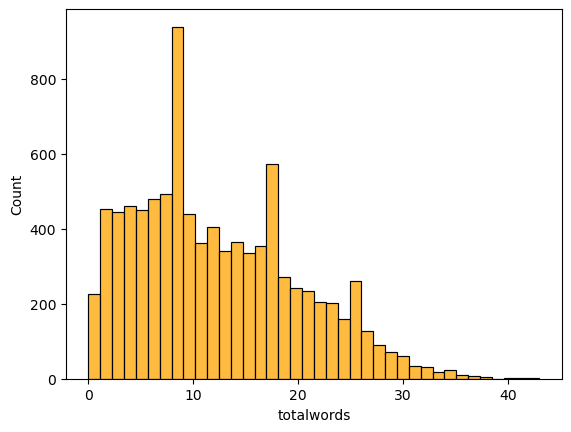

In [64]:
sns.histplot(data = df['totalwords'], color = "orange")

Most tweets comprise of around 5 - 15 words

In [67]:
wordCounter = Counter(" ".join(df["Content"]).split()).most_common(10)
df2 = pd.DataFrame(wordCounter)
df2

,0,1
0,kerala,3101
1,help,2123
2,people,1587
3,flood,1538
4,relief,1364
5,donate,1333
6,please,1258
7,need,1185
8,amp,919
9,rescue,730


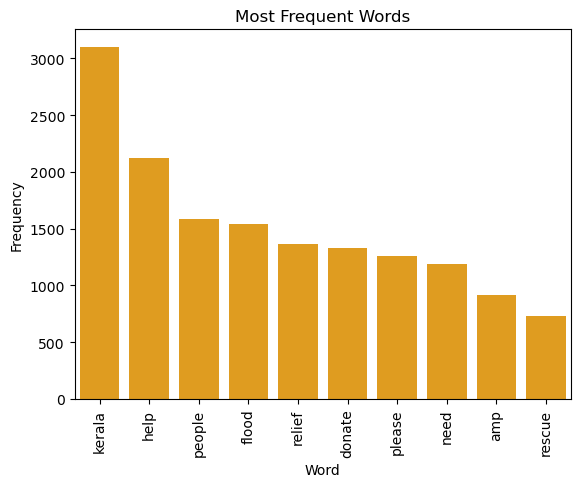

In [74]:
sns.barplot(data = df2, x= df2[0],y=df2[1], color="orange")
plt.xlabel("Word")
plt.xticks(rotation = 90)
plt.ylabel("Frequency")
plt.title("Most Frequent Words")
plt.show()